# Instituto Tecnológico y de Estudios Superiores de Monterrey
# Diplomado en Transformación Digital y Analytics Santander
# Especialidad Data Science – Módulo 2: Deep Learning

## Temario
- Introducción a Deep Learning
- Herramientas para Deep Learning
    - TensorFlow
    - Keras
- Perceptrón
- Redes Neuronales


## Log de instalación
- Anaconda 2019.10 for Windows Installer with Python 3.7 version, 64 bit graphical installer, https://www.anaconda.com/distribution/#download-section![image.png](attachment:image.png)
    - Actualizar Anaconda por medio del siguiente comando en un prompt de Anaconda
    
    `conda update -n base -c defaults conda`
- NLTK
    - NLTK Data
 - TensorFlow
 - GitHub Desktop
 

# Base de conocimiento
## Anaconda
[Guía de inicio](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)

[Conda Cheat Sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

[Using Pip to install packages to Anaconda Environment](https://stackoverflow.com/questions/41060382/using-pip-to-install-packages-to-anaconda-environment)
## Jupyter
[Markdown for Jupyter cheat sheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

## Ambiente Anaconda tf
### Crear el ambiente tf
Crear el ambiente desde un prompt de Anaconda:
`conda create -n tf tensorflow`
(tomar nota de la ubicación en el sistema de archivos del ambiente)

Activar el ambiente
`conda activate tf`

Desactivar el ambiente
`conda deactivate`

Ejecutar el intérprete de Python y verificar la versión
`python`
<img src="images/Python%20version.png" alt="Python version" title="Python version"/>
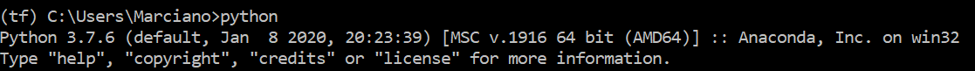

### Instalar paquetes de Python
Instalar los siguientes paquetes de Python por medio de un prompt de Anaconda y el comando conda install:

`conda install --name tf {package name}`
- matplotlib
- pandas
- seaborn

Para el caso de la librería cv2 referida en algunos ejemplos de código es necesario instalar opencv
`conda install -c conda-forge opencv`

### Instalar Spyder
Instalar Spyder desde Anaconda Navigator

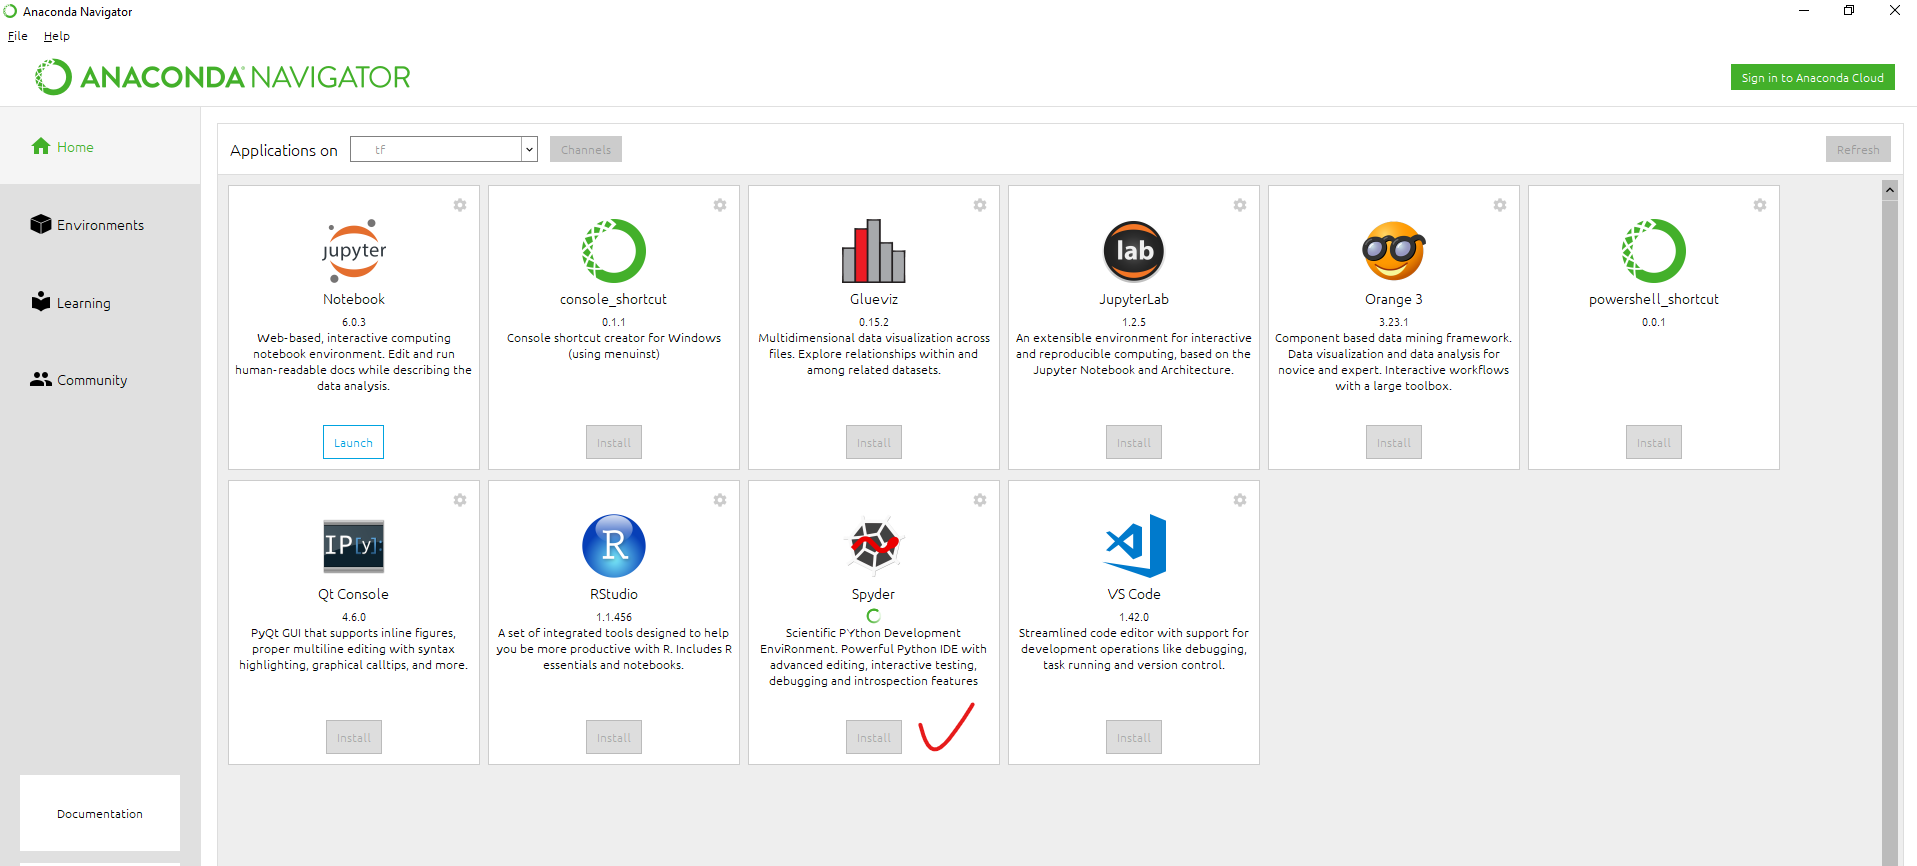

### Recursos del ambiente tf

La ubicación del ambiente se reporta en la sección ## Package Plan ## generada por la salida de conda create, p.e.

` ## Package Plan ##`

`environment location: C:\Users\Marciano\.conda\envs\tf`




# TensorFlow
## Introducción
TensorFlow es una plataforma integral de Machine Learning de código abierto. Cuenta con un ecosistema amplio y flexible de herramientas, librerías y comunidad que permite a los investigadores avanzar el estado del arte en ML. A los desarrolladores les permite crear y desplegar fácilmente aplicaciones habilitadas con ML.

[tensorflow.org](https://tensorflow.org) es el sitio principal del proyecto.


## Actualizar el código de TensorFlow 1.0 a 2.0
El artículo [Migrate your TensorFlow 1 code to TensorFlow 1](https://www.tensorflow.org/guide/migrate) describe las siguientes estrategias:
- Importar tensorflow en modo de compatibilidad con 1.0
    - Implica no tomar ventaja de las diversas mejoras en TensorFlow 2.0
- Ejecutar el script de actualización TF1.0 a TF2.0
- Actualizar el código manualmente de acuerdo con los lineamientos del documento, que permiten contar con código más simple, con mejor desempeño y más fácil de mantener

### Script de actualización de TensorFlow 1.0 a TensorFlow 2.0
[Enlace a la documentación del script](https://www.tensorflow.org/guide/upgrade)

El script se instala por default con TensorFlow 2.0 en la siguiente ruta: `[TF_ENVIRONMENT_PATH]\Lib\site-packages\tensorflow_core\tools\compatibility`

tf_upgrade_v2_main.py es el punto de entrada del script, su documentación se accede por medio de `python tf_upgrade_v2_main.py -h` 


# Keras
## Introducción
Keras es un API de alto nivel para redes neuronales, escrita en Python que es capaz de correr sobre TensorFlow, CNTK o Theano. Fue desarrollada con énfasis en habilitar experimentación rápida. Es recomendable el uso de Keras cuando se requiere de una libería de Deep Learning que:
- Permita el desarrollo de prototipos fácil y rápido (por medio de facilidad de uso, modularidad y extensibilidad).
- Soporte redes neuronales convolucionales (CNN) y redes neuronales recurrentes (RNN), así como combinaciones de ambas.
- Corra de forma natural en CPUs y GPUs.

[keras.io](https://keras.io) es el sitio principal del proyecto.
Notas adicionales.
